Kaggle: https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/?

# Time Series Data Analysis (Replicated from Kaggle)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
google = pd.read_csv('./Kaggle Data/GOOGL_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates = ['Date'])
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


Text(0.5, 1.0, 'Google stock attributes from 2008 to 2010')

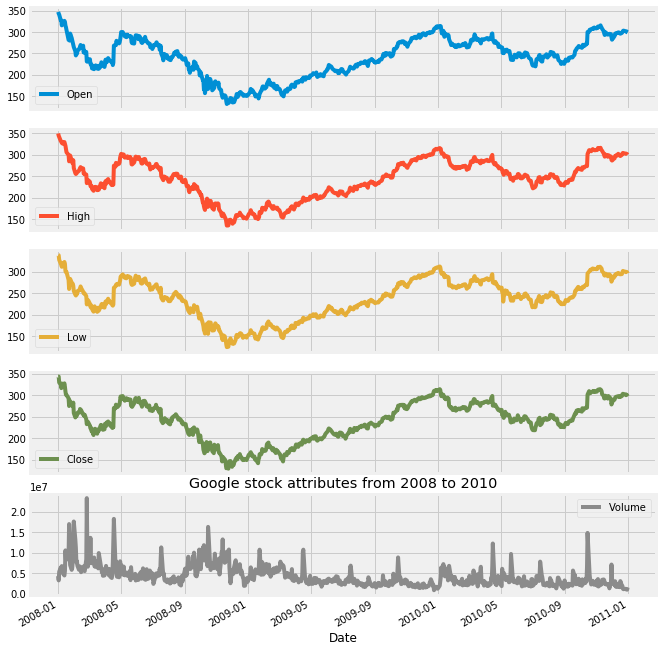

In [4]:
google['2008':'2010'].plot(subplots = True, figsize = (10, 12))
plt.title('Google stock attributes from 2008 to 2010')

## Timestamp vs Period
Timestamps represent a specific point in time, where as periods represent an interval in time.

In [5]:
# Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [6]:
# Period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [7]:
# Checking if timestamp exists in the given period
print(period.start_time)
print(period.end_time)
period.start_time < timestamp < period.end_time

2017-01-01 00:00:00
2017-01-01 23:59:59.999999999


True

In [8]:
# Timestamp to Period
new_period = timestamp.to_period(freq = 'H')
new_period

Period('2017-01-01 12:00', 'H')

In [9]:
new_timestamp = period.to_timestamp(freq = 'H', how = 'begin')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## Date_range
Date_range is a method that gives a fixed frequency date time index given start date, end date, and intervals (day, hour, minute, etc.). It is useful especially when creating your own timeseries attributes for pre-existing data or arranging data according to the created time series attribute

In [10]:
# datetimeindex daily
dr1 = pd.date_range(start = '1/1/18', end = '1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# datetimeindex monthly
dr2 = pd.date_range('1/1/18', '1/1/19', freq = 'M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [12]:
# datetimeindex without start date
dr3 = pd.date_range(end = '1/4/18', periods = 8)
dr3

DatetimeIndex(['2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31',
               '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# datetimeindex with start, end, and periods inbetween
dr4 = pd.date_range('2013-04-24', '2014-11-27', periods = 3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## to_datetime

In [14]:
df = pd.DataFrame({'year': [2015, 2016], 'month':[2, 3], 'day': [4, 5]})
df

year  month  day
0  2015      2    4
1  2016      3    5

In [15]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [16]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

# Finance and Statistics

In [17]:
google.columns = google.columns.str.lower()
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3019 non-null   float64
 1   high    3019 non-null   float64
 2   low     3019 non-null   float64
 3   close   3019 non-null   float64
 4   volume  3019 non-null   int64  
 5   name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 245.1+ KB


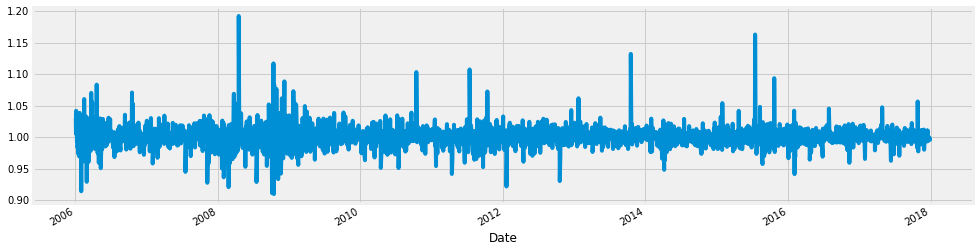

In [18]:
google['change'] = google.high.div(google.high.shift()) # returns change rate (div for dividing, shift for shifting by 1)
google['change'].plot(figsize = (15, 4))

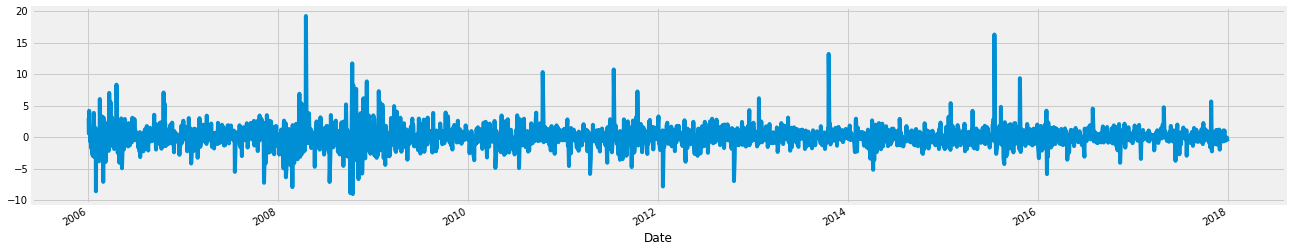

In [19]:
google['return'] = google.change.sub(1).mul(100) # sub for subtraction, mul for multiplication
google['return'].plot(figsize = (20, 4))

[]

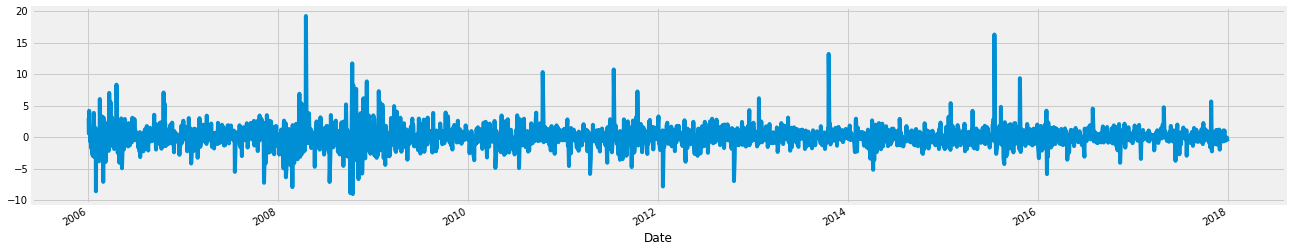

In [20]:
google.high.pct_change().mul(100).plot(figsize = (20, 4)).plot(figsize = (20, 4)) # pct_change calculates change by period

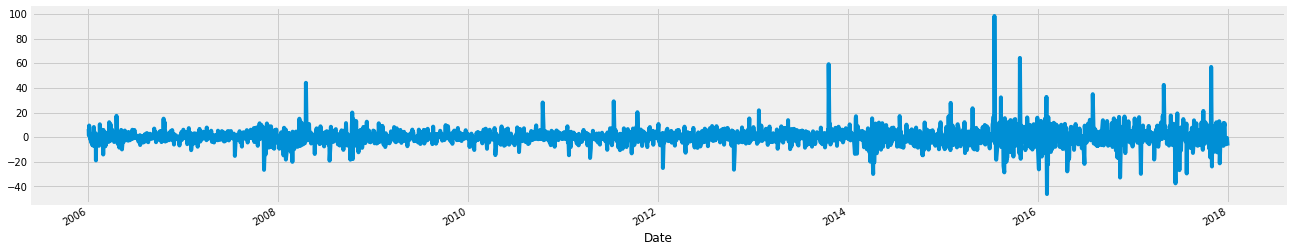

In [21]:
google.high.diff().plot(figsize = (20, 4)) # difference instead of percent change by successive period

## Comparing two or more time series

In [22]:
# Import Microsoft data
microsoft = pd.read_csv('./Kaggle Data/MSFT_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates = ['Date'])
microsoft.columns = microsoft.columns.str.lower()

In [23]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3019 non-null   float64
 1   high    3019 non-null   float64
 2   low     3019 non-null   float64
 3   close   3019 non-null   float64
 4   volume  3019 non-null   int64  
 5   name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


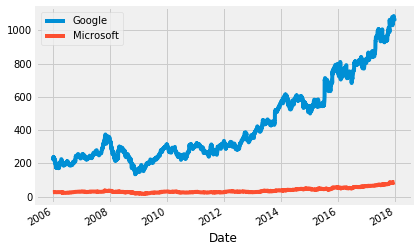

In [24]:
# Before normalization
google.high.plot()
microsoft.high.plot()
plt.legend(['Google', 'Microsoft'])
# Because Google's stock is so much higher than Microsoft, we must normalize their values in order to look at changes in
# both companies

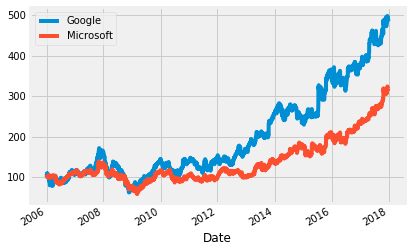

In [25]:
# Normalization
normalized_google = google.high.div(google.high.iloc[0]).mul(100)
normalized_microsoft = microsoft.high.div(microsoft.high.iloc[0]).mul(100)
### This is done in order for both of their stocks to start at 100 and see their changes over time

normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google', 'Microsoft'])

In [26]:
google.high.rolling('90D').mean()

Date
2006-01-03     218.050000
2006-01-04     221.375000
2006-01-05     222.916667
2006-01-06     226.060000
2006-01-09     228.236000
                 ...     
2017-12-22    1031.255000
2017-12-26    1035.805161
2017-12-27    1037.451774
2017-12-28    1038.887742
2017-12-29    1039.191905
Name: high, Length: 3019, dtype: float64

## Rolling Mean
Rolling mean is calculation of mean in a specified frame of time

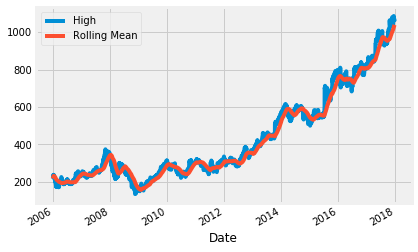

In [27]:
rolling_google = google.high.rolling('90D').mean()
google.high.plot()
rolling_google.plot()
plt.legend(['High', 'Rolling Mean'])

## Expanding Mean
Expanding mean is similar to taking a cumulative mean, but two differences:
1. does not return NA whenever there is NA value, it simply takes it as 0
2. returns NA until specific # of items are given

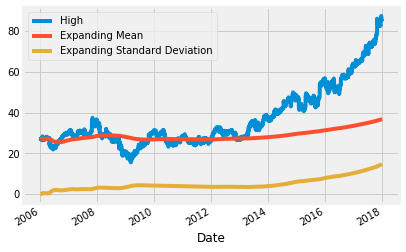

In [28]:
microsoft_mean = microsoft.high.expanding().mean()
microsoft_std = microsoft.high.expanding().std()
microsoft.high.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High', 'Expanding Mean', 'Expanding Standard Deviation'])

## OHLC Chart
OHLC chart shows open, high, low, and close price of a certain time period (OHLC stands for Open, High, Low, Close). They are used as a trading tool to visualize and analyze the price changes over time.

In [29]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
trace = go.Ohlc(x = google['06-2008'].index,
                open = google['06-2008'].open,
                high = google['06-2008'].high,
                low = google['06-2008'].low,
                close = google['06-2008'].close)
data = [trace]
iplot(data, filename = 'simple_ohlc')

In [30]:
trace = go.Ohlc(x = google['2008'].index,
                open = google['2008'].open,
                high = google['2008'].high,
                low = google['2008'].low,
                close = google['2008'].close)
data = [trace]
iplot(data, filename = 'simple_ohlc')

In [31]:
trace = go.Ohlc(x = google.index,
                open = google.open,
                high = google.high,
                low = google.low,
                close = google.close)
data = [trace]
iplot(data, filename = 'simple_ohlc')

## Candlestick Chart
Candlestick charts are also a method to visualize and analyze the price movements over time. The symbols look similar to boxplots, but are different.

Candlestick chart contains a lot of information including open price, close price, high price, and low price. The tips represent high/low price, and the box represents change in open to close price. If close price is higher than open price, the higher tip of box represent the close price and the color of the box is either white or green. However, if close price is lower than the open price, the higher tip of box represent the OPEN price and the color of the box is either black or red.

Candlestick charts are great for detecting market trends over time and are useful for interpreting the day-to-day sentiment of the market (longer body can be interpreted as intense pressure for selling/buying since there is a big change between close and open prices)

In [32]:
trace = go.Candlestick(x = google['03-2008'].index,
                      open = google['03-2008'].open,
                      high = google['03-2008'].high,
                      low = google['03-2008'].low,
                      close = google['03-2008'].close)
data = [trace]
iplot(data, filename = 'simple_candlestick')

In [33]:
trace = go.Candlestick(x = google['2008'].index,
                      open = google['2008'].open,
                      high = google['2008'].high,
                      low = google['2008'].low,
                      close = google['2008'].close)
data = [trace]
iplot(data, filename = 'simple_candlestick')

# Time Series and Decomposition and Random Walks

## Trends, Seasonality, and Noise
In interpreting time series data, there are three components:
1. Trend - consistent upward or downward slope of a time series
2. Seasonality - clear peroidic pattern of a time series
3. Noise - Outliers or missing values

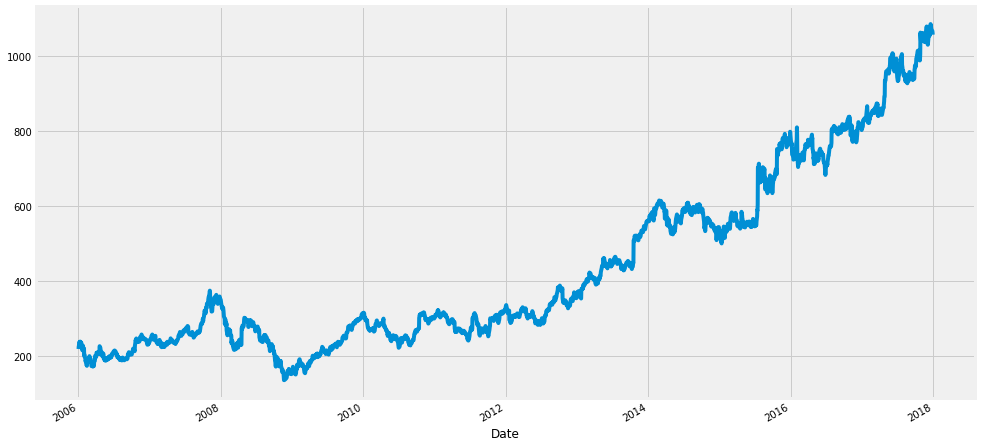

In [34]:
google['high'].plot(figsize = (15, 8))

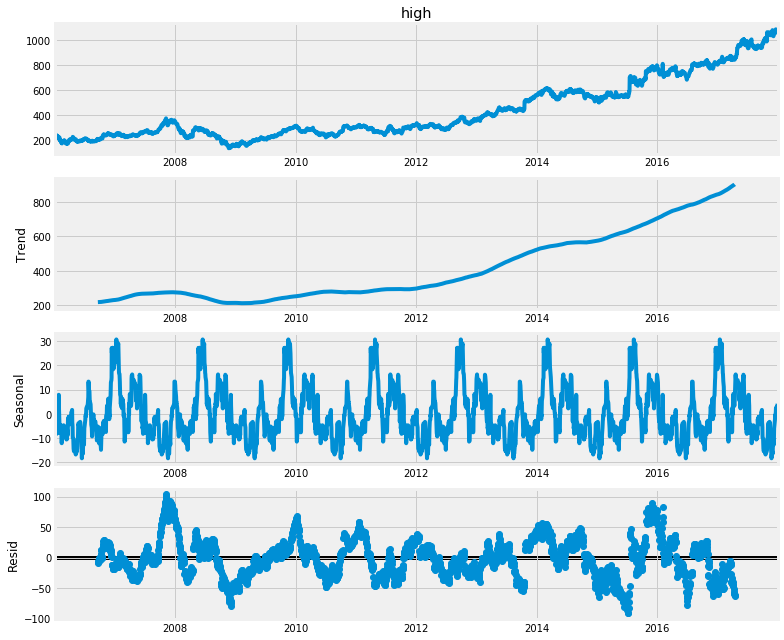

In [35]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google.high, freq = 360)
figure = decomposed_google_volume.plot()

We can clearly see an upward trend in trend plot, a spiking seasonal pattern in the seasonal plot, and non-uniform noise in resid plot that represent outliers and missing values

## Random Walk
Kaggle: a random walk is a mathematical object, known as stochastic or random process, that <b>describes a path that consists of a succession of random steps</b> on some mathematical space such as integers.

What we try to find using a regression test for random walk is if the increments in stock prices are purely due to a random factor (error), or if there is a factor that is statistically significant that causes the change in price.

Thus, Random Walk with Drift(drift(μ) is zero-mean):
<b>P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub></b>
where if there is no other significant factor (null hypothesis), μ = 0

Regression test for random walk <br>
<b>P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub></b><br>
<b>Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub></b>
<br>

Dickey-Fuller test:<br>
<b>H<sub>0</sub>: β = 0</b> (This is a random walk) <br>
<b>H<sub>1</sub>: β < 0</b> (This is not a random walk)

In [37]:
# Augmented Dickey Fuller Test on volume of Google and Microsoft Stocks
from statsmodels.tsa.stattools import adfuller
adf_m = adfuller(microsoft['volume'])
print(f'p-value of microsoft: {round(adf_m[1], 5)}')
adf_g = adfuller(google['volume'])
print(f'p-value of microsoft: {round(adf_g[1], 5)}')


p-value of microsoft: 0.00032
p-value of microsoft: 0.0


both p-values are less than 0.05, and thus we can say that volumes for both Microsoft and Google are not random walks

## Stationarity
A stationary time series data has constant mean, variance, autocorrelation, etc. over the time period.
 * Strong stationarity: unconditional joint probability distribution does not change even when shifted in time, and thus parameters do not change even with shift in time
 * Weak stationarity: parameters do not change throughout the time frame
 
Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modeling the time series.

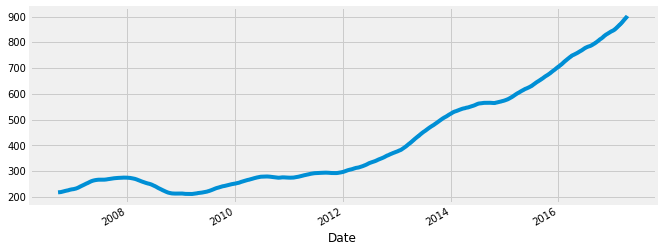

In [41]:
# working with Google dataset under seasonal decompose
decomposed_google_volume.trend.plot(figsize = (10, 4))

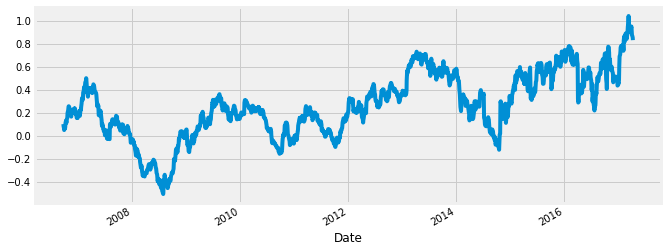

In [43]:
decomposed_google_volume.trend.diff().plot(figsize = (10, 4))

# Future Updates

# Modeling using statstools

## AR Models
Kaggle: An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the <b>output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term)</b>; thus the model is in the form of a stochastic difference equation.

<b>AR(1) Model</b><br>
R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>

<b>AR(2) Model</b><br>
R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>

<b>AR(3) Model</b><br>
R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>

### Simulating AR(1) Model

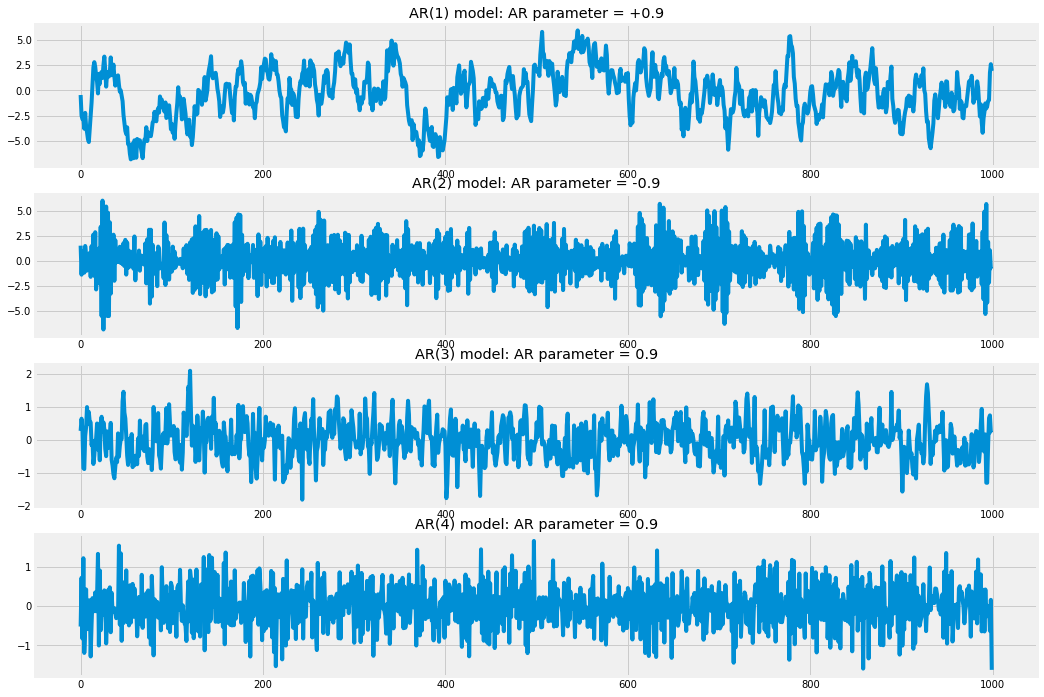

In [50]:
# AR(1) MA(1) Model: AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4, 1, 1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])

from statsmodels.tsa.arima_process import ArmaProcess
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample = 1000)

plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

# AR(1) MA(1) Model: AR parameter = -0.9
plt.subplot(4, 1, 2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])

AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample = 1000)

plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim2)

# AR(2) MA(1) Model: AR parameter = 0.9
plt.subplot(4, 1, 3)
ar3 = np.array([2, -0.9])
ma3 = np.array([1])

AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample = 1000)

plt.title('AR(3) model: AR parameter = 0.9')
plt.plot(sim3)

# AR(2) MA(1) Model: AR parameter = -0.9
plt.subplot(4, 1, 4)
ar4 = np.array([2, 0.9])
ma4 = np.array([1])

AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample = 1000)

plt.title('AR(4) model: AR parameter = 0.9')
plt.plot(sim4)


### Forecasting a simulated model

In [52]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(sim1, order = (1, 0))
result = model.fit()
print(result.summary())
print(f'μ = {result.params[0]}, ϕ = {result.params[1]}')

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1446.188
Method:                       css-mle   S.D. of innovations              1.027
Date:                Mon, 03 Aug 2020   AIC                           2898.376
Time:                        13:26:59   BIC                           2913.099
Sample:                             0   HQIC                          2903.971
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2787      0.343     -0.814      0.416      -0.950       0.393
ar.L1.y        0.9061      0.013     68.227      0.000       0.880       0.932
                                    Roots           

### Predicting the Models

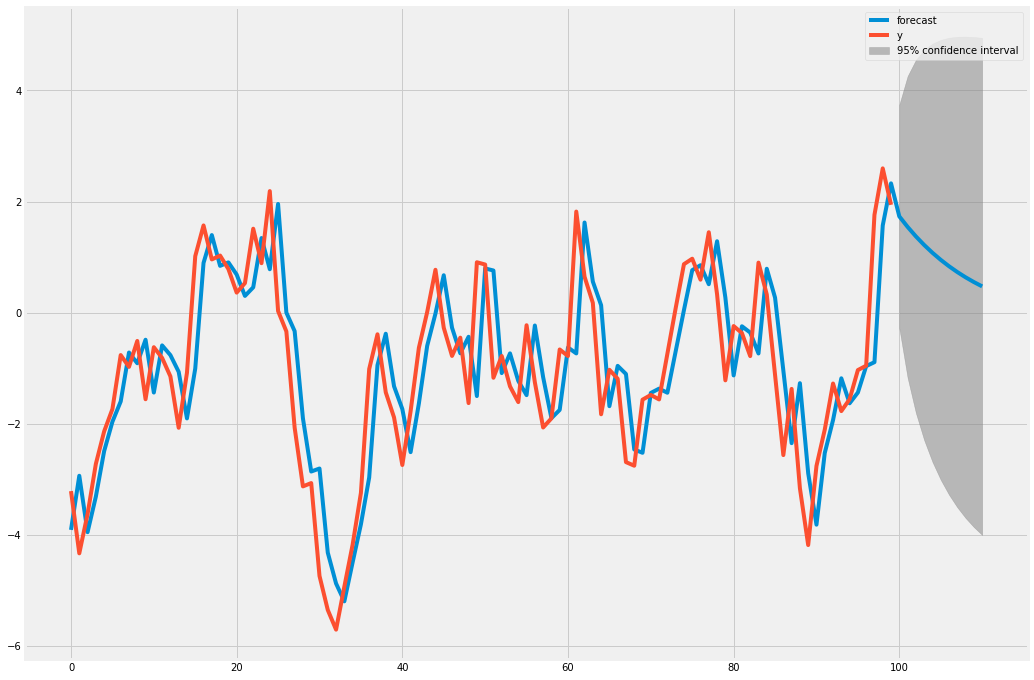

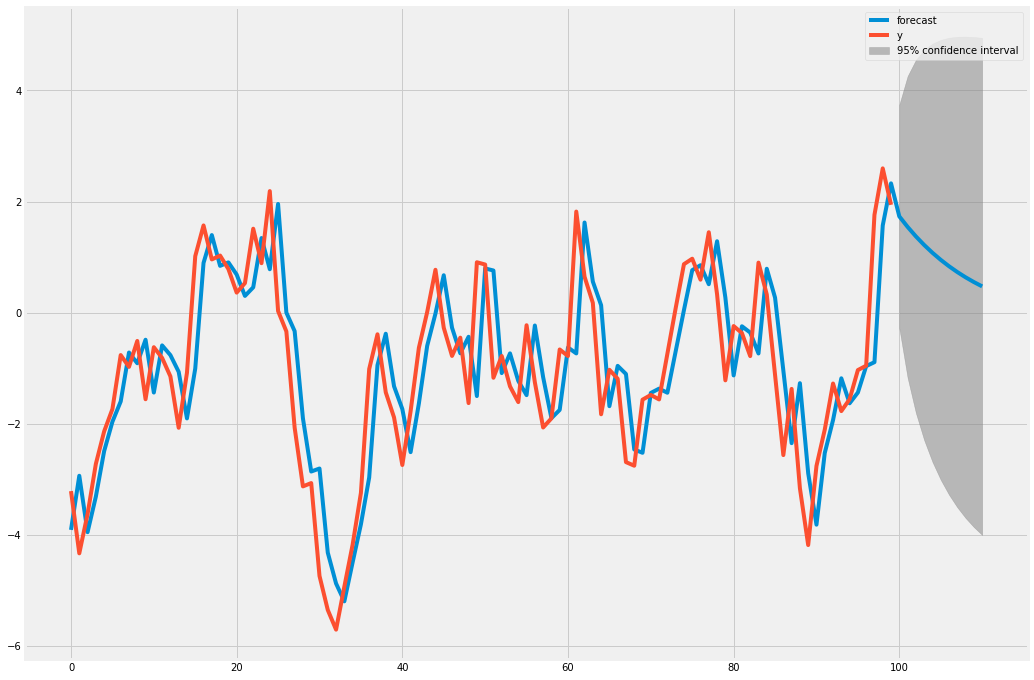

In [53]:
result.plot_predict(start = 900, end = 1010)